Let’s verify that everything is working correctly by downloading a pretrained model used
for sentiment analysis:

In [1]:
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

2023-08-26 17:45:29.880502: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:45:30.056772: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:45:30.057796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 17:45:31.177511: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
2023-08-26 17:50:

In [2]:
from transformers import pipeline
generator = pipeline(task="text-generation")

/home/sann-htet/anaconda3/envs/transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-26 17:50:40.888484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:50:40.928667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 17:50:40.929306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 17:50:41.830527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was su

In [3]:
generator("Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone. Or, perhaps, to the Elven-kings, and the Dwarves and Dwarves beneath them.\nAnd so I began'}]

In [4]:
generator ("The original theory of relativity is based upon the premise" + 
           "that all coordinate systems in relative uniform translatory motion to" + 
           "each other are equally valid and equivalent")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The original theory of relativity is based upon the premisethat all coordinate systems in relative uniform translatory motion toeach other are equally valid and equivalent, yet is still not in our knowledge. If any new theory is ever conceived. What does an'}]

In [5]:
generator ("It takes a great deal of bravery to stand up to our enemies")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'It takes a great deal of bravery to stand up to our enemies," Kuchera said. "If our enemies know who our allies are, they will use the very tactic to help their enemies, that is why we have seen strong leaders here'}]

## Autoselecting a model and autotokenization

We can easily import a pretrained model among the several dozen available.

In [6]:
from transformers import TFAutoModelForSequenceClassification
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

We can use AutoTokenizer to transform words into tokens used by the models:

In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
sequence = "The original theory of relativity is based upon the premise that all coordinate systems"
print(tokenizer(sequence))

{'input_ids': [101, 1996, 2434, 3399, 1997, 20805, 2003, 2241, 2588, 1996, 18458, 2008, 2035, 13530, 3001, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


## Named entity recognition

In [8]:
from transformers import pipeline
ner_pipe = pipeline("ner")
sequence = """Mr. and Mrs. Dursley, of number four, Privet Drive, were 
              proud to say that they were perfectly normal, thank you very much."""
for entity in ner_pipe(sequence):
    print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing TFBertForTokenClassification: ['dropout_147']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized 

{'entity': 'I-PER', 'score': 0.99908304, 'index': 6, 'word': 'Du', 'start': 13, 'end': 15}
{'entity': 'I-PER', 'score': 0.9869528, 'index': 7, 'word': '##rs', 'start': 15, 'end': 17}
{'entity': 'I-PER', 'score': 0.9784202, 'index': 8, 'word': '##ley', 'start': 17, 'end': 20}
{'entity': 'I-ORG', 'score': 0.6860199, 'index': 14, 'word': 'P', 'start': 38, 'end': 39}
{'entity': 'I-ORG', 'score': 0.7713562, 'index': 15, 'word': '##rive', 'start': 39, 'end': 43}
{'entity': 'I-ORG', 'score': 0.76567674, 'index': 16, 'word': '##t', 'start': 43, 'end': 44}
{'entity': 'I-ORG', 'score': 0.8087188, 'index': 17, 'word': 'Drive', 'start': 45, 'end': 50}


## Summarization

In [9]:
from transformers import pipeline
summarizer = pipeline("summarization")
ARTICLE = """
Mr.
and Mrs.
Dursley, of number four, Privet Drive, were proud to say
that they were perfectly normal, thank you very much.
They were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.
Mr.
Dursley was the director of a firm called Grunnings, which made
drills.
He was a big, beefy man with hardly any neck, although he did
have a very large mustache.
Mrs.
Dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors.
The Dursleys had a small son called Dudley and in their
opinion there was no finer boy anywhere"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
2023-08-26 18:39:45.817614: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x13594390 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-26 18:39:45.817683: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version
2023-08-26 18:39:45.879107: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var 

[{'summary_text': "Mr. and Mrs. Dursley, of number four, were the last people you'd expect to be involved in anything strange or mysterious . the Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere ."}]


If we want to change to a different model. That’s extremely simple as we only
need to change one parameter:

In [10]:
summarizer = pipeline("summarization", model='t5-base')

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
/home/sann-htet/anaconda3/envs/transformer/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padd

## Fine-tuning

First, let’s load and tokenize the Yelp dataset:

In [5]:
from datasets import load_dataset
dataset = load_dataset("yelp_review_full")

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [6]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

Map: 100%|███████████████████████| 50000/50000 [00:30<00:00, 1634.53 examples/s]


Then let’s convert them to TF format datasets:

In [7]:
from transformers import DefaultDataCollator
data_collator = DefaultDataCollator(return_tensors="tf")

# convert the tokenized datasets to TensorFlow datasets
tf_train_dataset = small_train_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8,
)

tf_validation_dataset = small_eval_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids", "token_type_ids"],
    label_cols=["labels"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8,
)

/home/sann-htet/anaconda3/envs/transformer/lib/python3.11/site-packages/datasets/arrow_dataset.py:400: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


Now, we can use `TFAutoModelForSequenceClassification`, specifically selecting **bert-base-
cased**:

In [8]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

In [10]:
model.fit(tf_train_dataset, 
          validation_data=tf_validation_dataset,
          epochs=3)

Epoch 1/3


KeyboardInterrupt: 

## TFHub

Let’s see a simple example where we load a
pretrained model for computing embeddings. In this case, we use `nnlm-en-dim128`, a token-based
text embedding trained on the **English Google News 200B corpus**:

In [11]:
import tensorflow_hub as hub

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(["The rain in Spain.", "falls",
                    "mainly", "In the plain!"])

print(embeddings.shape)

2023-08-26 20:22:12.087948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 498570752 exceeds 10% of free system memory.


(4, 128)


2023-08-26 20:22:13.226519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sentences' with dtype string and shape [?]
	 [[{{node sentences}}]]


Now let’s see how to use `BERT`.

In [13]:
import seaborn as sns
from sklearn.metrics import pairwise
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text # Imports TF ops for preprocessing.

Let’s define a few sentences used for comparing their similarities:

In [14]:
sentences = [
"Do not pity the dead, Harry. Pity the living, and, above all those who live without love.",
"It is impossible to manufacture or imitate love",
"Differences of habit and language are nothing at all if our aims are identical and our hearts are open.",
"What do I care how he looks? I am good-looking enough for both of us, I theenk! All these scars show is zat my husband is brave!",
"Love as powerful as your mother's for you leaves it's own mark. To have been loved so deeply, even though the person who loved us is gone, will give us some protection forever.",
"Family…Whatever yeh say, blood's important. . . .",
"I cared more for your happiness than your knowing the truth, more for your peace of mind than my plan, more for your life than the lives that might be lost if the plan failed."
]

Then, let’s use a pretrained `BERT` model available on `TFHub` to compute embeddings on the
input sentences just defined. `BERT’s` output is the set of embeddings itself:

In [15]:
#@title Configure the model { run: "auto" }
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2"
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)
inputs = preprocess(sentences)
outputs = bert(inputs)

2023-08-26 21:04:38.249002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-08-26 21:04:38.250186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-08-26 21:04:38.250513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'seq_length' with dtype int32
	 [[{{node seq_length}}]]
2023-08-26 21:04:38.251442: I tensorflow/core/

Now let’s define some auxiliary functions to show the similarity among embeddings based on
`pairwise.cosine_similarity`:

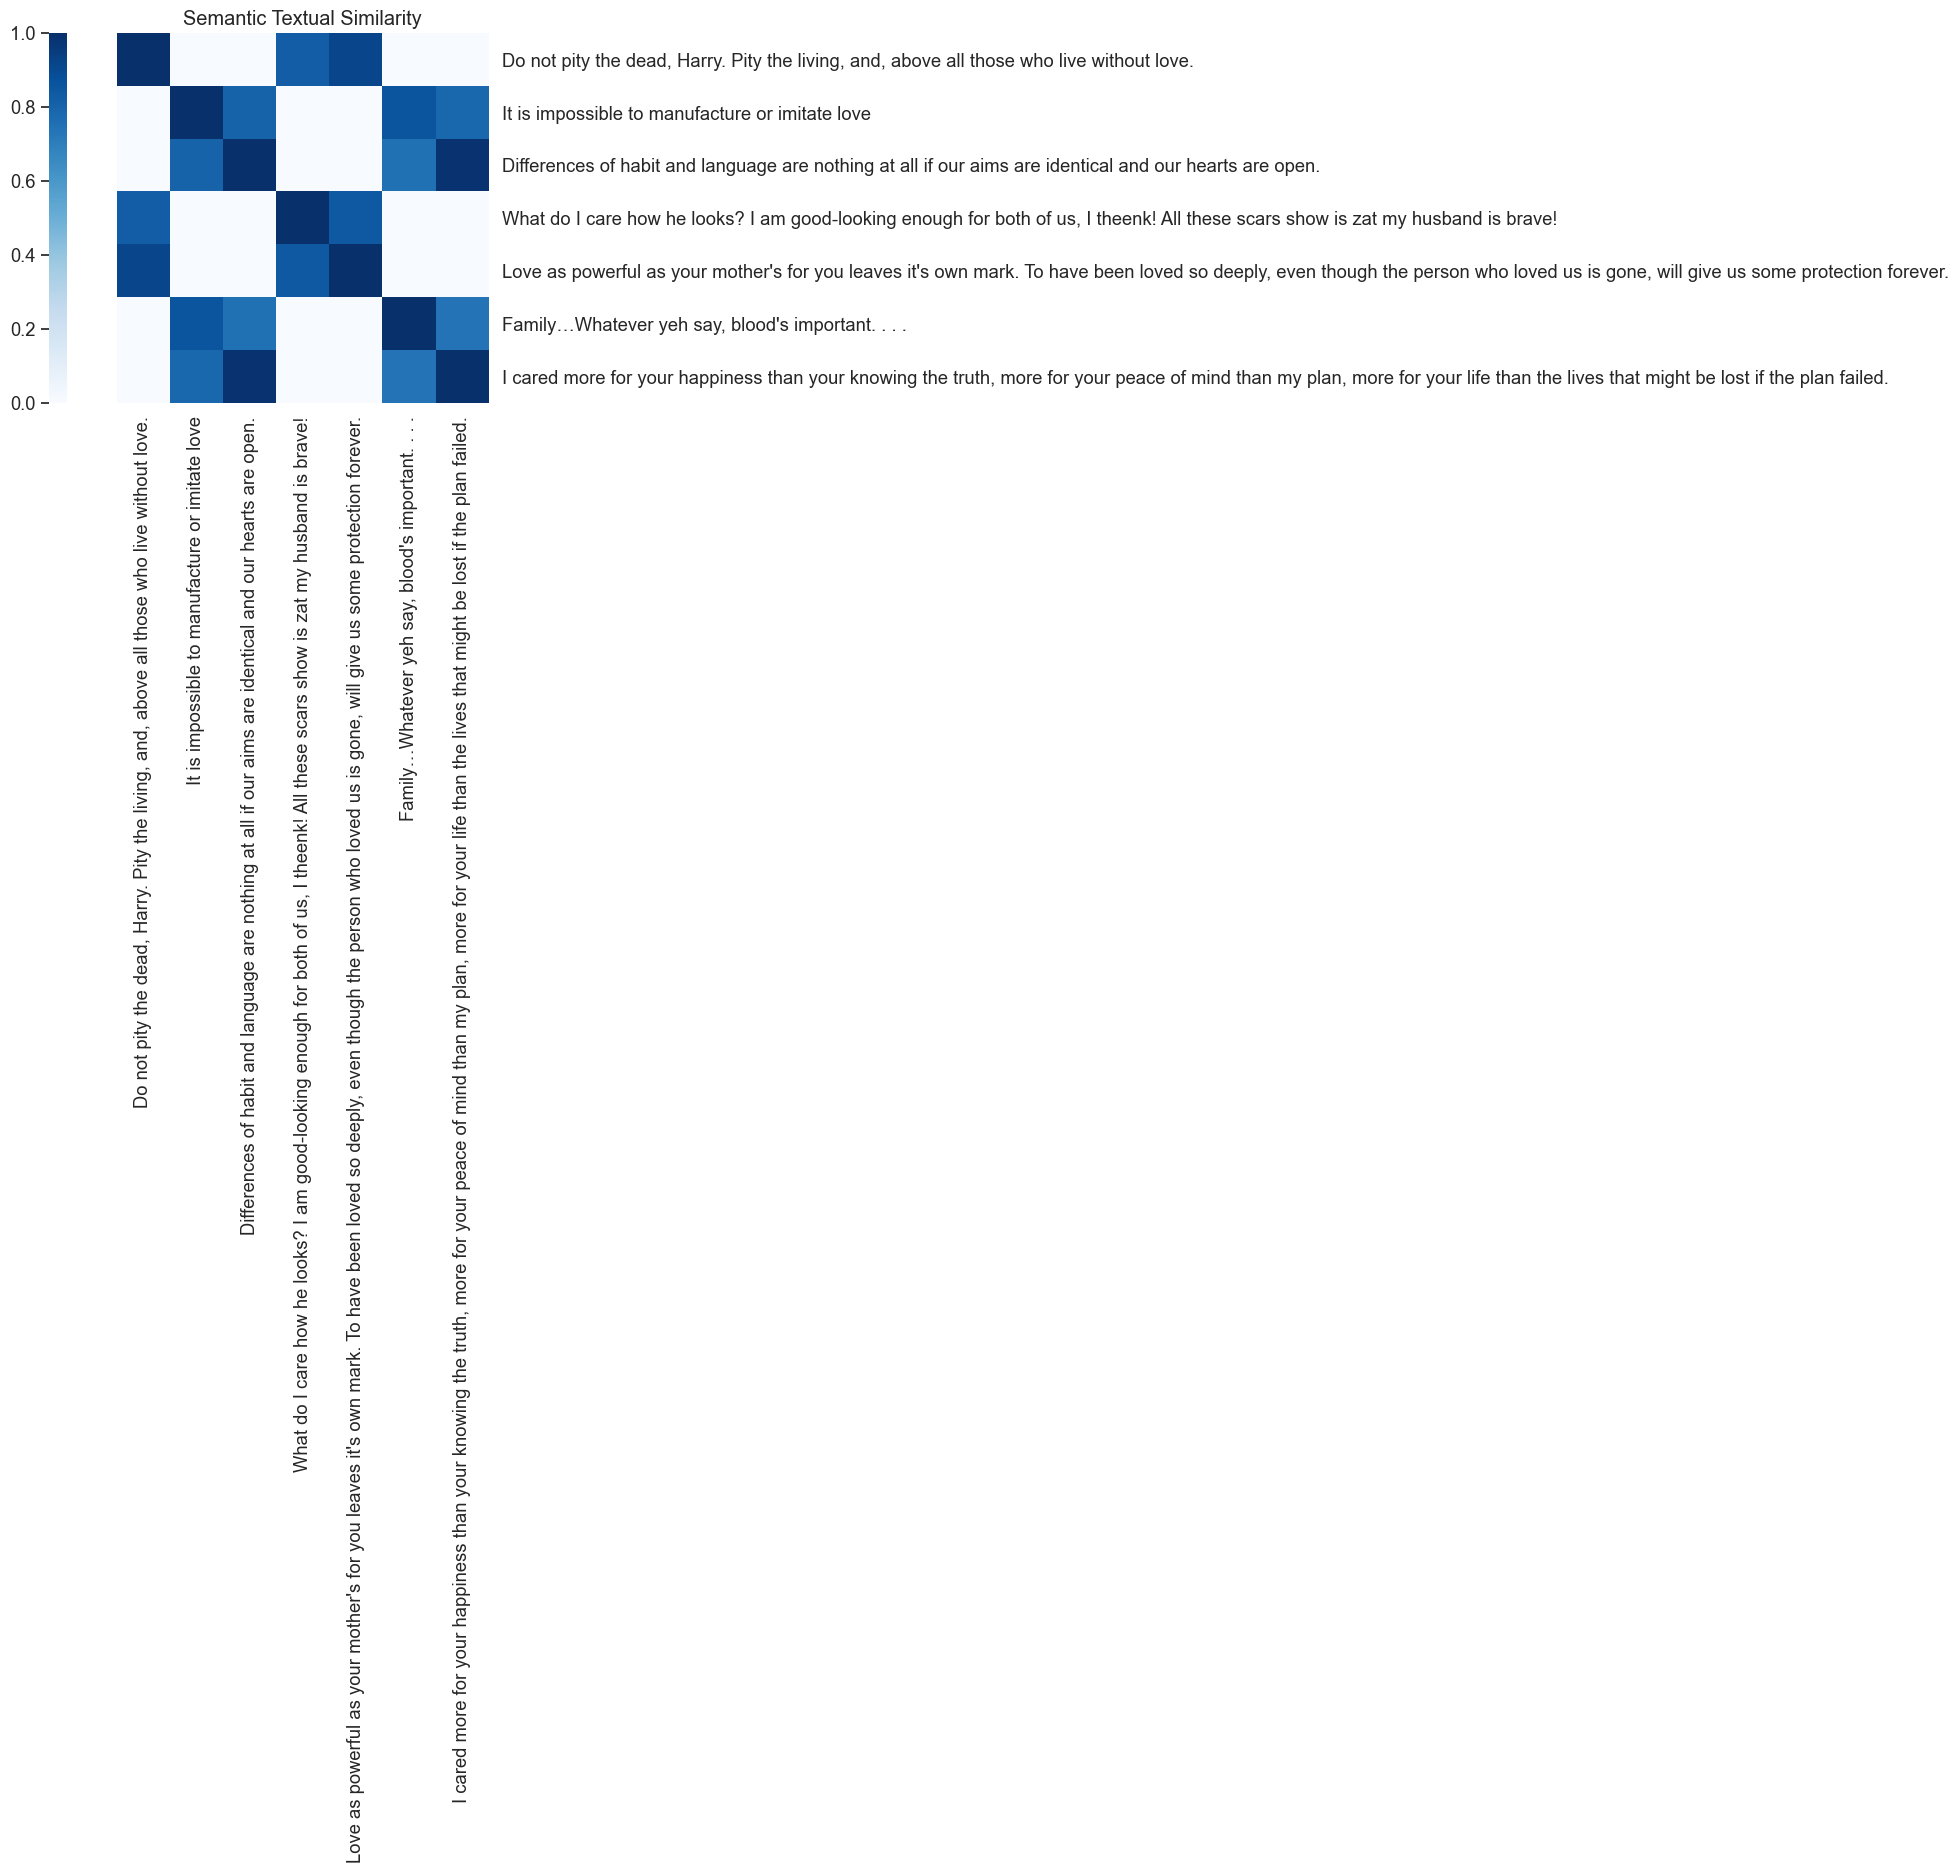

In [16]:
def plot_similarity(features, labels):
    """Plot a similarity matrix of the embeddings."""
    cos_sim = pairwise.cosine_similarity(features)
    sns.set(font_scale=1.2)
    cbar_kws = dict(use_gridspec=False, location="left")
    g = sns.heatmap(
            cos_sim, xticklabels=labels, yticklabels=labels,
            vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
    g.tick_params(labelright=True, labelleft=False)
    g.set_yticklabels(labels, rotation=0)
    g.set_title("Semantic Textual Similarity")
    
plot_similarity(outputs["pooled_output"], sentences)

---